In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('DEMO_PHQ.csv')
df2 = pd.read_csv('PAG_HEI.csv')

In [19]:
df.isnull().sum()

SEQN        0
DPQ010      0
DPQ020      0
DPQ030      0
DPQ040      0
DPQ050      0
DPQ060      0
DPQ070      0
DPQ080      0
DPQ090      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDEDUC     0
INDFMINC    0
dtype: int64

In [4]:
df['INDFMINC'].unique()

array([ 4., 11., 12.,  3.,  1.,  7.,  5., 10.,  8.,  6.,  2.,  9., 13.,
       99., nan, 77.])

In [5]:
#This goes replace all NaN to 9 from tables DPQ010 to DPQ090  [9 = Não sabe (not know)] | 498 values must be affecteds
# Also 47 values INDFMINC Nan to 77 = Se recusou a responder(refused to answer)
df.fillna({"DPQ010": 9, "DPQ020": 9, "DPQ030": 9, "DPQ040": 9, "DPQ050": 9, "DPQ060": 9, "DPQ070": 9, "DPQ080": 9, "DPQ090": 9, "INDFMINC": 77}, inplace=True)

In [7]:
df.isnull().sum()

SEQN        0
DPQ010      0
DPQ020      0
DPQ030      0
DPQ040      0
DPQ050      0
DPQ060      0
DPQ070      0
DPQ080      0
DPQ090      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDEDUC     0
INDFMINC    0
dtype: int64

In [8]:
df_full = pd.merge(df, df2, on="SEQN", how="inner")

In [9]:
df_full[df_full.columns[1:10]] = df_full.iloc[:, 1:10].astype('int')

In [23]:
df_full.DPQ010.nunique()
df_full['DPQ010'].unique()

array([9, 0, 1, 2, 3])

In [21]:
values=[7,9]
filtered_df = df_full[~df.DPQ010.isin(values)]
filtered_df

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
1,31131,0,0,0,0,0,0,0,0,0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0,Sem Sintomas
2,31132,0,0,0,0,0,0,0,0,0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0,Sem Sintomas
3,31134,0,0,0,0,0,0,0,0,0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0,Sem Sintomas
4,31139,0,0,0,0,3,1,0,0,0,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4,Sem Sintomas
5,31143,0,1,1,1,1,1,1,0,0,...,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6,Sintomas Leves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0,0,1,1,0,0,0,0,0,...,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2,Sem Sintomas
5330,41468,0,2,0,1,1,2,1,3,0,...,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10,Sintomas Moderados
5331,41469,1,0,0,1,0,0,0,0,0,...,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,1,Sem Sintomas
5332,41472,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0,Sem Sintomas


In [11]:
df_full['PHQ9'] = df.iloc[:,2:9].sum(axis=1) 
df_full['PHQ9'] = df_full['PHQ9'].astype('int')
df_full

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9
0,31130,9,9,9,9,9,9,9,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
1,31131,0,0,0,0,0,0,0,0,0,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0
2,31132,0,0,0,0,0,0,0,0,0,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0
3,31134,0,0,0,0,0,0,0,0,0,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0
4,31139,0,0,0,0,3,1,0,0,0,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0,0,1,1,0,0,0,0,0,...,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2
5330,41468,0,2,0,1,1,2,1,3,0,...,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10
5331,41469,1,0,0,1,0,0,0,0,0,...,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,1
5332,41472,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0


In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    5334 non-null   int32  
 2   DPQ020                    5334 non-null   int32  
 3   DPQ030                    5334 non-null   int32  
 4   DPQ040                    5334 non-null   int32  
 5   DPQ050                    5334 non-null   int32  
 6   DPQ060                    5334 non-null   int32  
 7   DPQ070                    5334 non-null   int32  
 8   DPQ080                    5334 non-null   int32  
 9   DPQ090                    5334 non-null   int32  
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

In [13]:
#function for classifying depression based on values
def f(row):
    if row['PHQ9'] <5:
        val = 'Sem Sintomas'
    elif row['PHQ9'] < 10:
        val = 'Sintomas Leves'
    elif row['PHQ9'] < 15:
        val = 'Sintomas Moderados'
    elif row['PHQ9'] < 19:
        val = 'Sintomas Moderados Severos'
    else:
        val = 'Sintomas Severos'
    return val

df_full['PHQ_GRP'] = df_full.apply(f, axis=1)

In [14]:
df_full.isnull().sum()

SEQN                          0
DPQ010                        0
DPQ020                        0
DPQ030                        0
DPQ040                        0
DPQ050                        0
DPQ060                        0
DPQ070                        0
DPQ080                        0
DPQ090                        0
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                      0
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
PHQ9    

In [15]:
# Removing NaN for analysis
df_clean = df_full.dropna()
# remove prefix
df_clean.columns = df_clean.columns.str.replace("HEI2015", "")
df_clean

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,C7_TOTPROT,C8_SEAPLANT_PROT,C9_FATTYACID,C10_SODIUM,C11_REFINEDGRAIN,C12_SFAT,C13_ADDSUG,_TOTAL_SCORE,PHQ9,PHQ_GRP
1,31131,0,0,0,0,0,0,0,0,0,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0,Sem Sintomas
2,31132,0,0,0,0,0,0,0,0,0,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0,Sem Sintomas
3,31134,0,0,0,0,0,0,0,0,0,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0,Sem Sintomas
4,31139,0,0,0,0,3,1,0,0,0,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4,Sem Sintomas
5,31143,0,1,1,1,1,1,1,0,0,...,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6,Sintomas Leves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0,0,1,1,0,0,0,0,0,...,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2,Sem Sintomas
5330,41468,0,2,0,1,1,2,1,3,0,...,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10,Sintomas Moderados
5331,41469,1,0,0,1,0,0,0,0,0,...,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,1,Sem Sintomas
5332,41472,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0,Sem Sintomas


In [16]:
df_clean = df_clean.loc[:,"C7_TOTPROT":"PHQ_GRP"]
df_clean

,C7_TOTPROT,C8_SEAPLANT_PROT,C9_FATTYACID,C10_SODIUM,C11_REFINEDGRAIN,C12_SFAT,C13_ADDSUG,_TOTAL_SCORE,PHQ9,PHQ_GRP
1,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0,Sem Sintomas
2,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0,Sem Sintomas
3,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0,Sem Sintomas
4,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4,Sem Sintomas
5,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6,Sintomas Leves
...,...,...,...,...,...,...,...,...,...,...
5329,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2,Sem Sintomas
5330,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10,Sintomas Moderados
5331,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,1,Sem Sintomas
5332,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0,Sem Sintomas


In [17]:
df_clean.describe()

,C7_TOTPROT,C8_SEAPLANT_PROT,C9_FATTYACID,C10_SODIUM,C11_REFINEDGRAIN,C12_SFAT,C13_ADDSUG,_TOTAL_SCORE,PHQ9
count,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000,5060.000000
mean,4.434237,2.593381,4.706986,4.762261,5.798963,6.067985,6.220367,49.971421,6.331225
std,1.008311,2.171836,3.237059,3.420252,3.496261,3.178186,3.330305,12.324533,15.156708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212,0.000000
25%,4.171156,0.000000,2.023710,1.587909,2.925413,3.697080,3.724867,41.032289,0.000000
50%,5.000000,2.588240,4.430397,4.833553,6.234319,6.414811,6.864138,49.512445,2.000000
75%,5.000000,5.000000,7.270784,7.650807,9.253265,8.997076,9.454234,58.168013,4.000000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383,63.000000


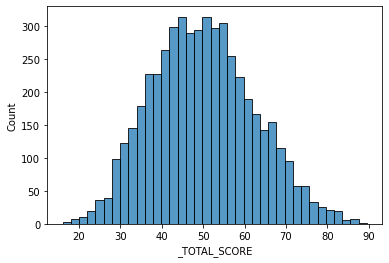

In [26]:
sns.histplot(df_clean['_TOTAL_SCORE'])
plt.show()

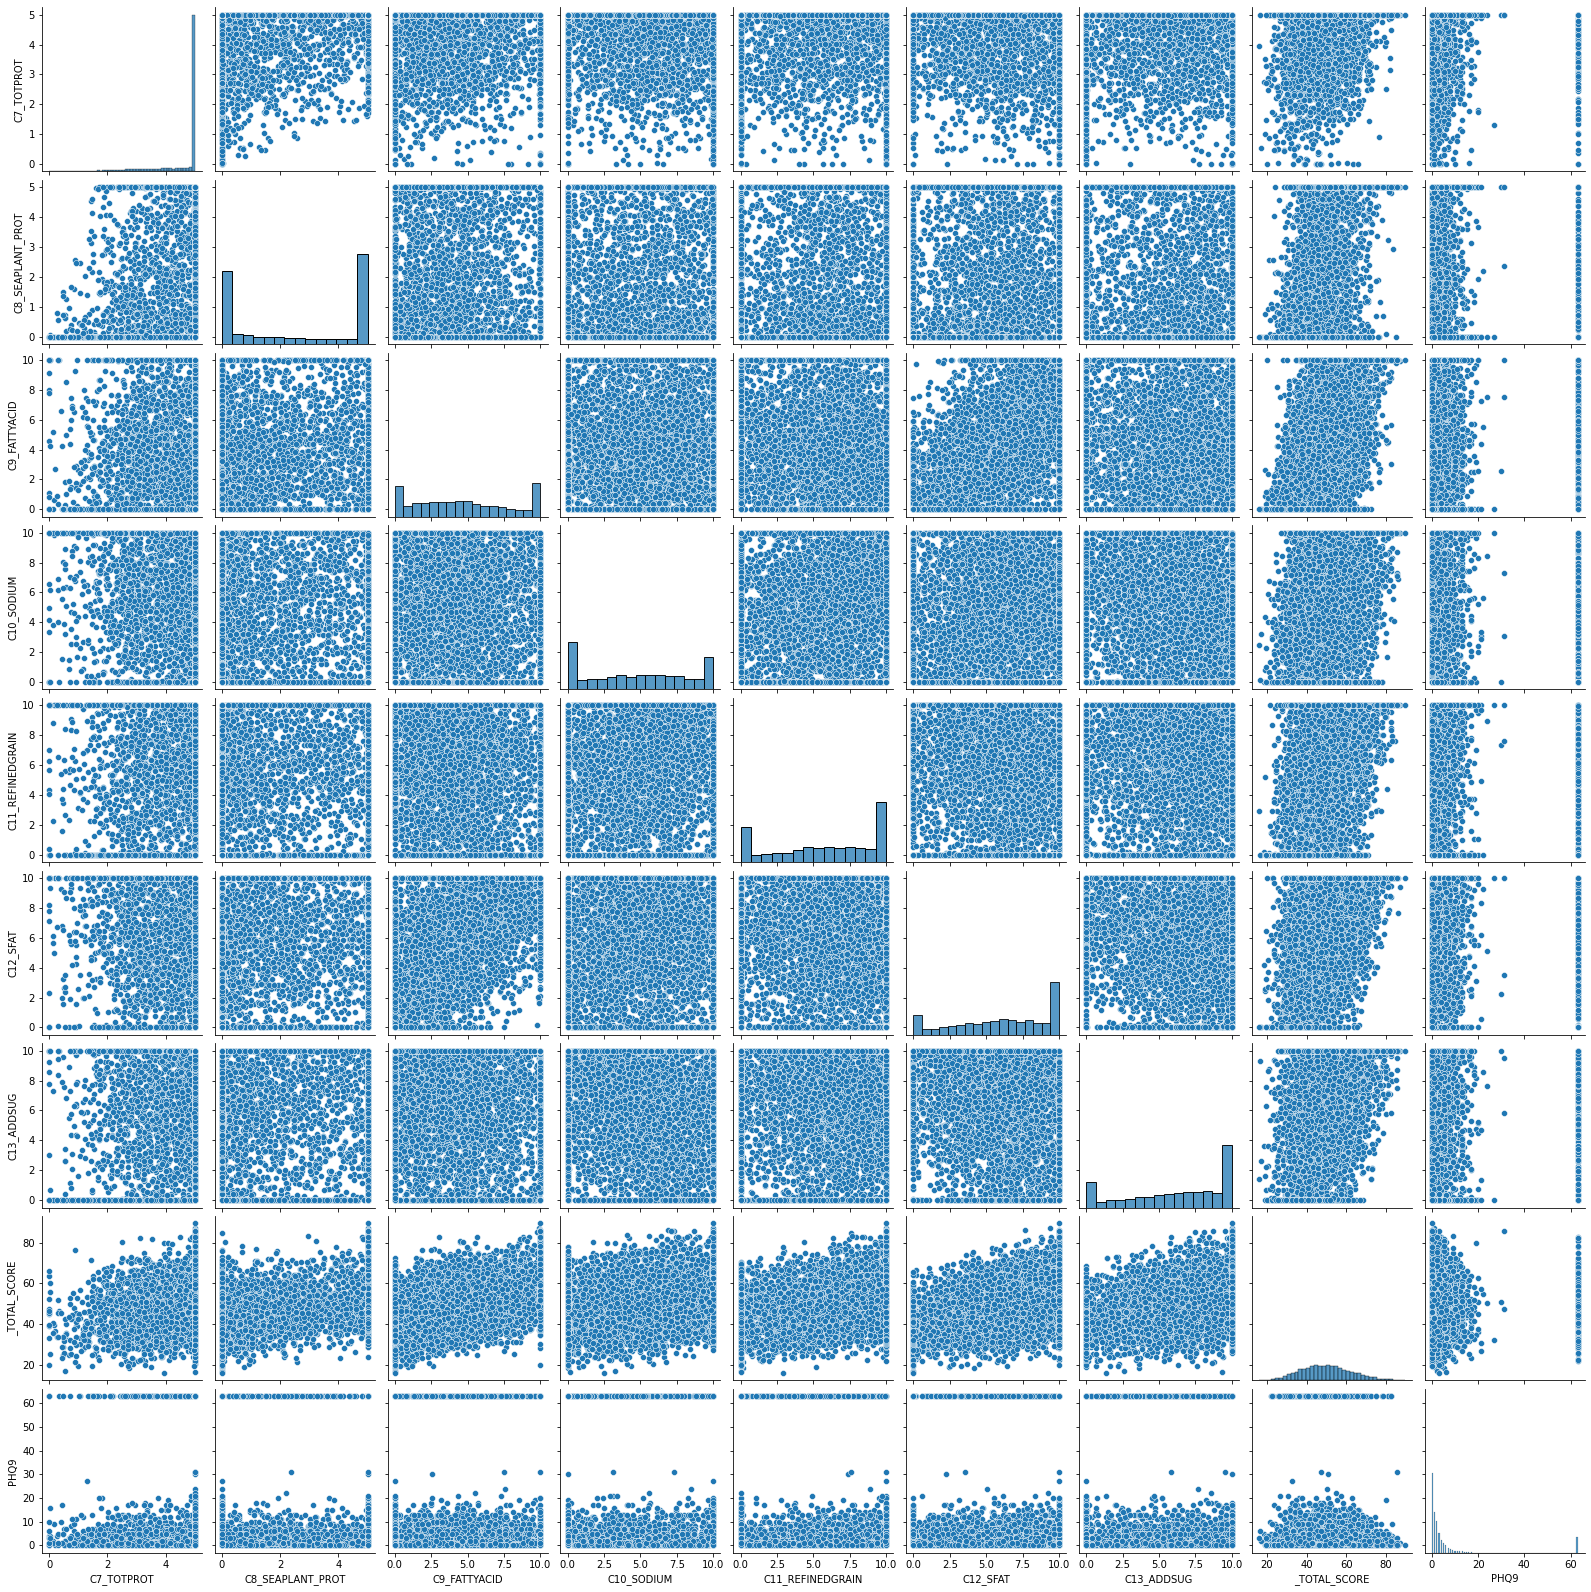

In [28]:
sns.pairplot(df_clean)